In [1]:
import sqlite3

# Connect to SQLite database (will create file if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create the sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    date TEXT,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert some sample data
sample_data = [
    ('2025-06-01', 'Laptop', 2, 50000),
    ('2025-06-01', 'Mouse', 5, 500),
    ('2025-06-02', 'Keyboard', 3, 1000),
    ('2025-06-02', 'Laptop', 1, 50000),
    ('2025-06-03', 'Mouse', 4, 500),
    ('2025-06-03', 'Keyboard', 2, 1000),
]

cursor.executemany("INSERT INTO sales (date, product, quantity, price) VALUES (?, ?, ?, ?)", sample_data)
conn.commit()
cursor.close()


📋 Sales Summary:
    product  total_qty   revenue
0  Keyboard         15   15000.0
1    Laptop          9  450000.0
2     Mouse         27   13500.0


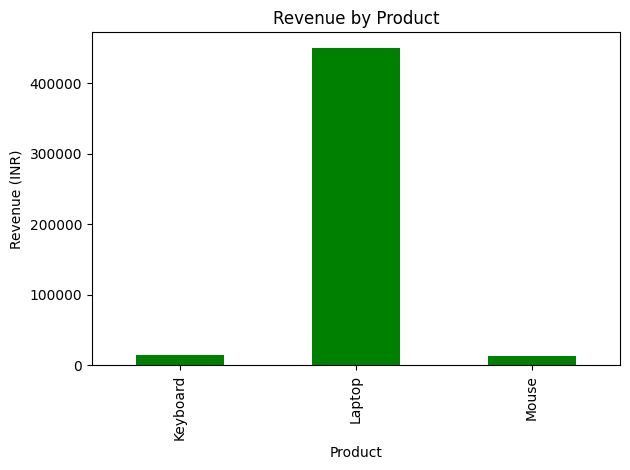

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the database again
conn = sqlite3.connect("sales_data.db")

# SQL query to summarize data
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Load result into DataFrame
df = pd.read_sql_query(query, conn)

# Print summary
print("📋 Sales Summary:")
print(df)

# Plot revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False, color='green')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue (INR)")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Saves the chart as an image file
plt.show()

conn.close()
